#                             Pharmaceutical Sales prediction 
###                            Exploration of customer purchasing behavior

### Overview

You work at Rossmann Pharmaceuticals as a data scientist. The finance team wants to forecast sales in all their stores across several cities six weeks ahead of time. Managers in individual stores rely on their years of experience as well as their personal judgement to forecast sales. The data team identified factors such as promotions, competition, school and state holidays, seasonality, and locality as necessary for predicting the sales across the various stores. Your job is to build and serve an end-to-end product that delivers this prediction to Analysts in the finance team.

### Data

The data and feature description for this challenge can be found here (https://www.kaggle.com/c/rossmann-store-sales/data).

# Table of content
1.  Importing the required libraries 
2.  Data importation
3.  Data understanding and processing   
    * Train dataset
    * Store dataset
    * Test dataset
4. Exploratory data analysis

### Importing the necessary libraries

In [95]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# os
import os

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline


# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats

import dataframe_image as dfi

import warnings
warnings.filterwarnings('ignore')

First, we need to import the path with the raw data

In [96]:
# setting the raw path
raw_data_path = os.path.join(os.path.pardir,"data","raw")
train_file_path = os.path.join(raw_data_path,"train.csv")
test_file_path = os.path.join(raw_data_path,"test.csv")
store_file_path = os.path.join(raw_data_path,"store.csv")

### Data importation
Next, we import the data.

In [97]:
test_data = pd.read_csv(test_file_path)
train_data = pd.read_csv(train_file_path)
store_data = pd.read_csv(store_file_path)

### Data understanding
We now have a look at the structure of each data to understand it,check for missing values and deal with them

#### a)Train set

In [98]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [99]:
# Having a glance of the train data set.
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


###   Below is the Variable description of the train dataset
| variable         | description |
| ---------------- | ------------|
| `Store`                            | a unique Id for each store. |
| `DayOfWeek`                        | Day of the week. |
| `Date`                             | date. |
| `Sales`                            | the turnover for any given day (this is what you are predicting). |
| `Customers`                        | the number of customers on a given day. |
| `Open`                             | an indicator for whether the store was open: 0 = closed, 1 = open. |
| `StateHoliday`                     | indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. |
| `SchoolHoliday`                    | indicates if the (Store, Date) was affected by the closure of public schools. |
| `Promo`                            | indicates whether a store is running a promo on that day. |


In [100]:
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [101]:
train_data.shape

(1017209, 9)

In [102]:
# checking for missing values
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Yeey! there are no missing values in the train data

It would be of help to extract the dates from the variable `Date` since we are working with time series data for further analysis

In [103]:
#converting the 'Date' column  to date formate
train_data["Date"] = pd.to_datetime(train_data["Date"],format = "%Y-%m-%d")

# extracting the parameters of interest;
train_data['day'] = train_data['Date'].dt.day
train_data['month'] = train_data['Date'].dt.month
train_data['year'] = train_data['Date'].dt.year

In [104]:
train_data['WeekOfYear'] = train_data['Date'].dt.week

In [105]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,31


In [106]:
#train_data = train_data.drop(["Date"],1) No need to drop the date here. It will be useful.

In [107]:
#rearranging the vars;
train_data = train_data[["Store","Date","day","month","year","DayOfWeek","WeekOfYear","Sales","Customers","Open","Promo","StateHoliday","SchoolHoliday"]]

In [108]:
train_data.head(2)

,Store,Date,day,month,year,DayOfWeek,WeekOfYear,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2015-07-31,31,7,2015,5,31,5263,555,1,1,0,1
1,2,2015-07-31,31,7,2015,5,31,6064,625,1,1,0,1


`SchoolHoliday`

In [109]:
train_data["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

`StateHoliday` has has two 0 (str and int). Therefore we neeed to correct this where;
`a = public holiday`, `b = Easter holiday`, `c = Christmas`, `o = None`

In [110]:
train_data["StateHoliday"].replace({0:"o","0":"o"},inplace = True)

The next step is to have a closer look at our variables to check for missing values,outliers or any inconsistency.
To start with we will have a glance of the distribution of the continous variables of interest,i.e	`Sales`	and `Customers`

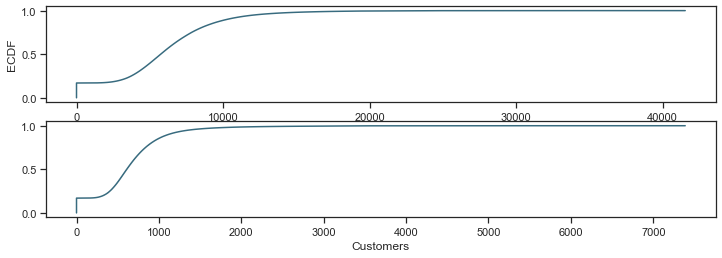

In [111]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train_data['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(train_data['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

#plt.savefig("ECDF.png")
#plt.show

About 20% of data has zero amount of sales / customers that we need to deal with and almost 80% of time daily amount of sales was less than 1000. So what about zero sales,let's dig deeper to know what was the cause. would it be because of closed stores or even state holiday's?

In [112]:
# closed stores and Zero sales stores
train_data[(train_data.Open == 0) & (train_data.Sales == 0)].head(5)

,Store,Date,day,month,year,DayOfWeek,WeekOfYear,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,2015-07-31,31,7,2015,5,31,0,0,0,1,o,1
875,876,2015-07-31,31,7,2015,5,31,0,0,0,1,o,1
1406,292,2015-07-30,30,7,2015,4,31,0,0,0,1,o,1
1990,876,2015-07-30,30,7,2015,4,31,0,0,0,1,o,1
2521,292,2015-07-29,29,7,2015,3,31,0,0,0,1,o,1


172817 rows which is about 16% of the total observations indicate the numbers of stores that closed and made no sales at all due various reasons
And since we don't want to bias model to consider those exceptions, the best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance.

In [113]:
# Open stores and Zero sales stores
with_zero_sales = train_data[(train_data["Open"] != 0) & (train_data["Sales"] == 0)]#.head(5)
with_zero_sales.shape

(54, 13)

There're only 54 days in the data with no sales in working days(open), so we can assume that there were external factors involved, for example manifestations.

Knowing this, we can now get rid of the closes stored with zero sales

In [114]:
train_data = train_data[(train_data["Open"] != 0) & (train_data["Sales"] != 0)]

In [115]:
train_data.shape

(844338, 13)

Now let's consider the open stores with zero sales.

There are none!

### Outliers
`Sales`

In [63]:
train_data["Sales"].describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

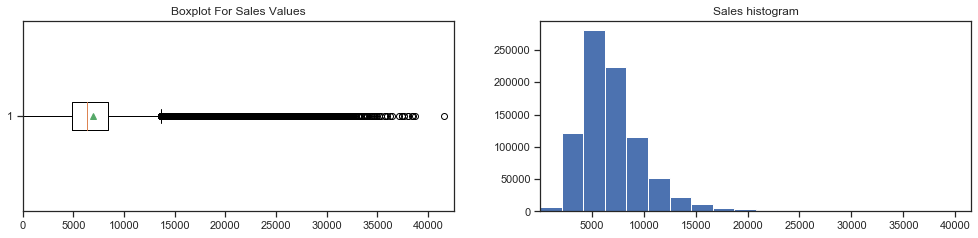

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
# Plotting a boxplot
axes[0].boxplot(train_data.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(train_data["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
# Plotting a histogram
axes[1].hist(train_data.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(train_data.Sales), max(train_data.Sales)))

#plt.savefig("Sales_outlier.png")
#plt.show

The observation is that

`Customers`

In [21]:
train_data["Customers"].describe()

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

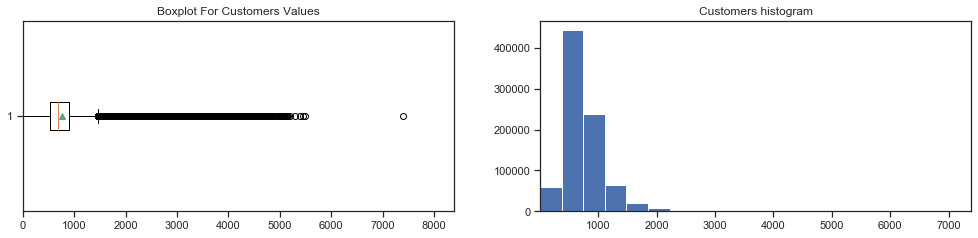

In [210]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
# Plotting a boxplot
axes[0].boxplot(train_data.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(train_data["Customers"]+1000))
axes[0].set_title('Boxplot For Customers Values')
# Plotting a histogram
axes[1].hist(train_data.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(train_data.Customers), max(train_data.Customers)))

#plt.savefig("Customer_outlier.png")
#plt.show

#### b)store data set

In [116]:
store_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [117]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


###   Below is the Variable description of the store data
| variable         | description |
| ---------------- | ------------|
| `Store`                            | a unique Id for each store. |
| `StoreType`                        | differentiates between 4 different store models: a, b, c, d. |
| `Assortment`                       | describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here. |
| `CompetitionDistance`              | distance in meters to the nearest competitor store. |
| `CompetitionOpenSinceMonth`        | gives the approximate  month of the time the nearest competitor was opened. |
| `CompetitionOpenSinceYear`         | gives the approximate year of the time the nearest competitor was opened. |
| `Promo2`                           | Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating. |
| `Promo2SinceWeek`                  | describes the calendar week when the store started participating in Promo2. |
| `Promo2SinceYear`                  | describes the year  when the store started participating in Promo2. |
| `PromoInterval`                    |  describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. |

In [118]:
store_data.shape

(1115, 10)

In [119]:
#checking for missing values
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We have few variables with missing values that we need to deal with. Let's dive in!!
 `CompetitionDistance`

In [120]:
# missing values in CompetitionDistance
store_data[pd.isnull(store_data.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


No particular pattern observed therefore it makes a complete sense to replace NaN with the median values.
This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores.
Having no promotion means those fields have to be 0 as well since they are linked to Promo2.

In [121]:
# Computing the median
median_CompetitionDistance = store_data["CompetitionDistance"].median()
# Imputing the missing value in CompetitionDistance column
store_data["CompetitionDistance"].fillna(median_CompetitionDistance,inplace = True)
# Checking if the column 'CompetitionDistance' have any missing values
store_data["CompetitionDistance"].isnull().sum()

0

In [122]:
#store_data["CompetitionOpenSinceYear"].value_counts()
store_data["Promo2"].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

Second we are going to deal with the missing values in `Promo2SinceWeek` `Promo2SinceYear`	`PromoInterval`

In [123]:
#store_data[["Promo2","Promo2SinceWeek",	"Promo2SinceYear","PromoInterval"]]
store_data[pd.isnull(store_data.Promo2SinceWeek)].head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


There is a pattern, there are null values in the column: `Promo2SinceWeek`,`Promo2SinceYear`,`PromoInterval` when `Promo2` is 0(indicating the store did not participate),It is therefore wise to impute the missing values with zero.
    

In [124]:
'''
#df['DataFrame Column'] = df['DataFrame Column'].fillna(0) :for a column
#df.fillna(0)
'''

store_data.Promo2SinceWeek.fillna(0,inplace=True)
store_data.Promo2SinceYear.fillna(0,inplace=True)
store_data.PromoInterval.fillna(0,inplace=True)

Finally we deal with the missing values in `CompetitionOpenSinceMonth`	`CompetitionOpenSinceYear` 

In [125]:
store_data.CompetitionOpenSinceYear.fillna(0,inplace=True)
store_data.CompetitionOpenSinceMonth.fillna(0,inplace=True)

#### c) Train data set

In [126]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [127]:
test_data.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


###   Below is the Variable description of the store data
| variable         | description |
| ---------------- | ------------|
|Id                                  | an Id that represents a (Store, Date) duple within the test set
| `Store`                            | a unique Id for each store. |
| `DayOfWeek`                        | Day of the week. |
| `Date`                             | date. |
| `Open`                             | an indicator for whether the store was open: 0 = closed, 1 = open. |
| `StateHoliday`                     | indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. |
| `SchoolHoliday`                    | indicates if the (Store, Date) was affected by the closure of public schools. |
| `Promo`                            | indicates whether a store is running a promo on that day. |

In [128]:
test_data.shape

(41088, 8)

In [129]:
#checking for missing values
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

It would be of help to extract the dates from the variable `Date` since we are working with time series data for further analysis

In [130]:
#converting the 'Date' column  to date formate
test_data["Date"] = pd.to_datetime(test_data["Date"],format = "%Y-%m-%d")

# extracting the parameters of interest;
test_data['day'] = test_data['Date'].dt.day
test_data['month'] = test_data['Date'].dt.month
test_data['year'] = test_data['Date'].dt.year

The variable Open(an indicator whether the store was open or not) has missing values therefore we have to deal with it.Let's dive in!

In [131]:
test_data["Open"].value_counts()

1.0    35093
0.0     5984
Name: Open, dtype: int64

Most of the data shows that that the store was open, therefore we are going to impute the missing values with the mode, Open = 1.

In [132]:
test_data.loc[test_data.Open.isnull(), "Open"] = 1

In [133]:
test_data["Open"].isnull().sum()

0

Now let's have a closer lok at our variables.

In [134]:
test_data["StateHoliday"].value_counts()

0    40908
a      180
Name: StateHoliday, dtype: int64

`StateHoliday`. For comformity purposes with the train dataset, we convert have the `0` representing None to `o`. Therefore we will end up having `a = public holiday`, `b = Easter holiday`, `c = Christmas`, `o = None`

In [135]:
test_data["StateHoliday"].replace({"0":"o"},inplace = True)

## Dataset Merge

Now that we have dealt with the missing values in the datasets, lets merge the train and test dataset eith the store dataset since it adds important features to the dataset that will be useful.

In [136]:
train_store_df = pd.merge(train_data,store_data,how = "inner",on = "Store")
test_store_df = pd.merge(test_data,store_data,how = "inner",on = "Store")

In [137]:
print("The shape of train_store_df is: ", train_store_df.shape)
print("The shape of test_store_df is: ", test_store_df.shape)

The shape of train_store_df is:  (844338, 22)
The shape of test_store_df is:  (41088, 20)


Let's add a new variable `SalePerCustomer` which will be useful in testin the performance of the store

In [138]:
train_store_df["SalePerCustomer"] = train_store_df["Sales"]/train_store_df["Customers"]

In [140]:
train_store_df["StateHoliday"].value_counts()

o    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

Our data is now preprocessed, let's save it to be used for modelling purposes.

In [92]:
test_store_df.to_csv("processed_test_store_df.csv", index=False)

In [93]:
train_store_df.to_csv("processed_train_store_df.csv", index=False)

### Explonatory Data Analysis

#### Seasonality Analysis

In [236]:
train_time_series = train_data[['Date','Sales']]

In [239]:
train_time_series = train_time_series.set_index('Date')

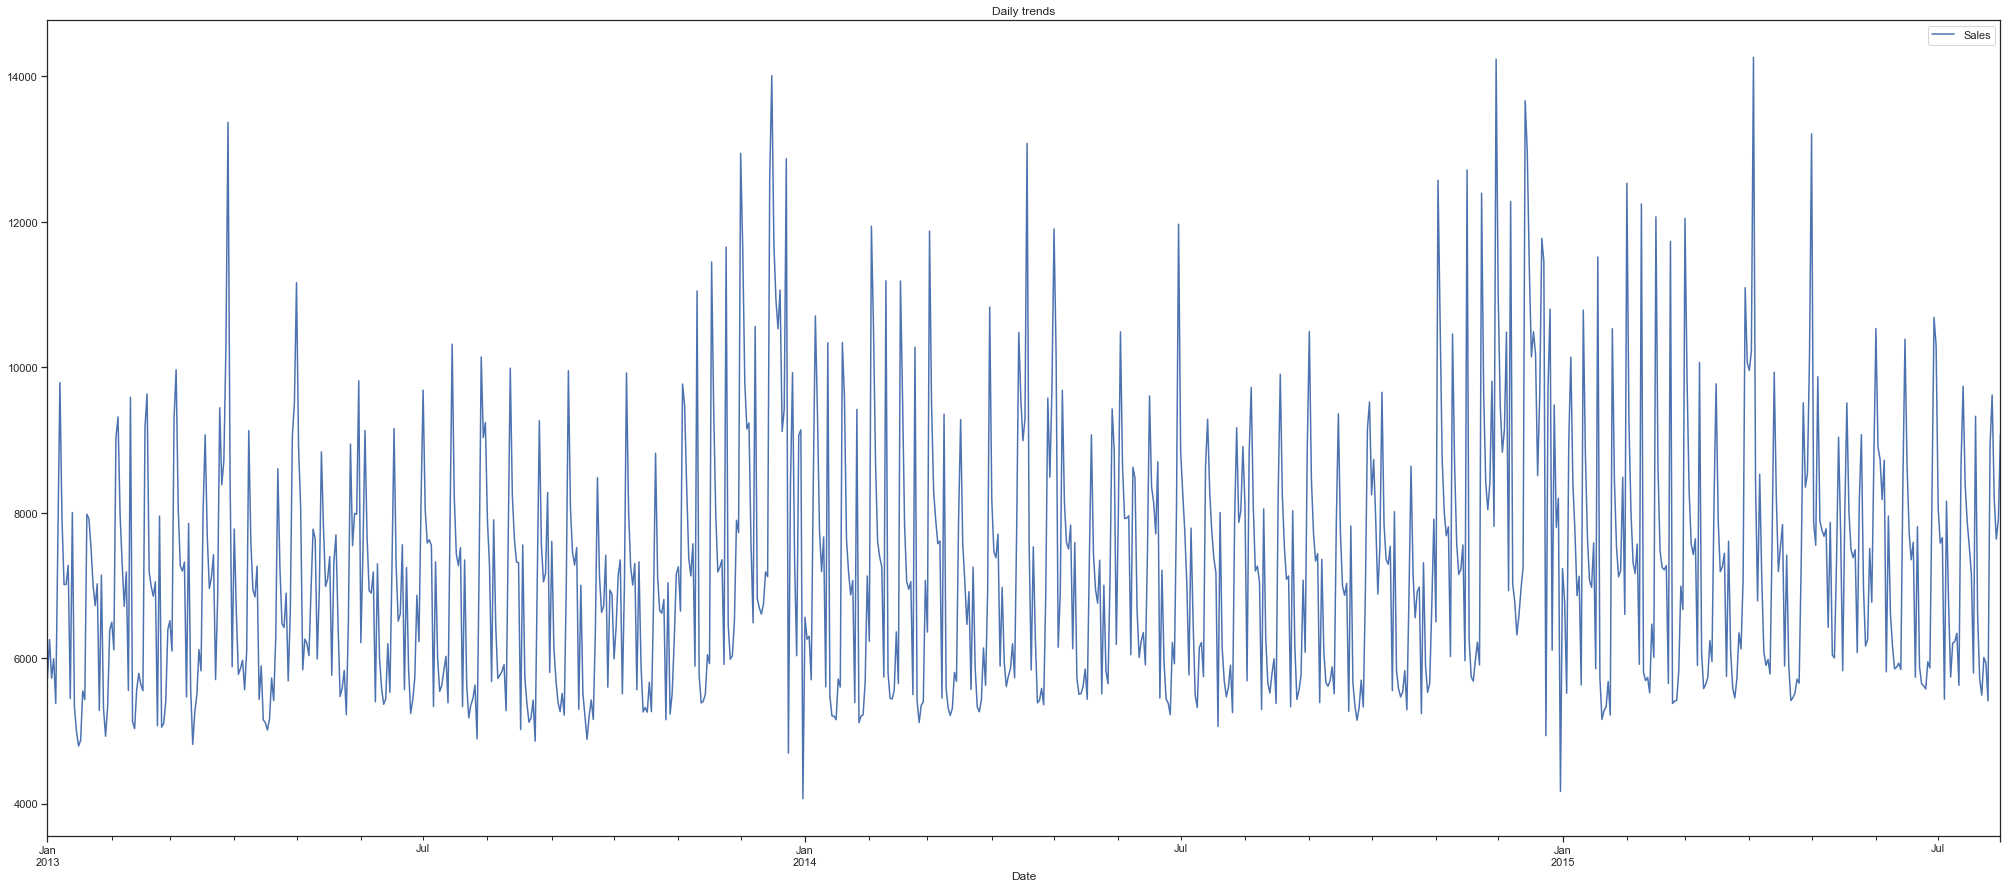

In [244]:
time_series_day = train_time_series.resample('D').mean()
time_series_day.plot(figsize=(35,15))
plt.title("Daily trends")
#plt.savefig("Daily_trends.png")
plt.show()

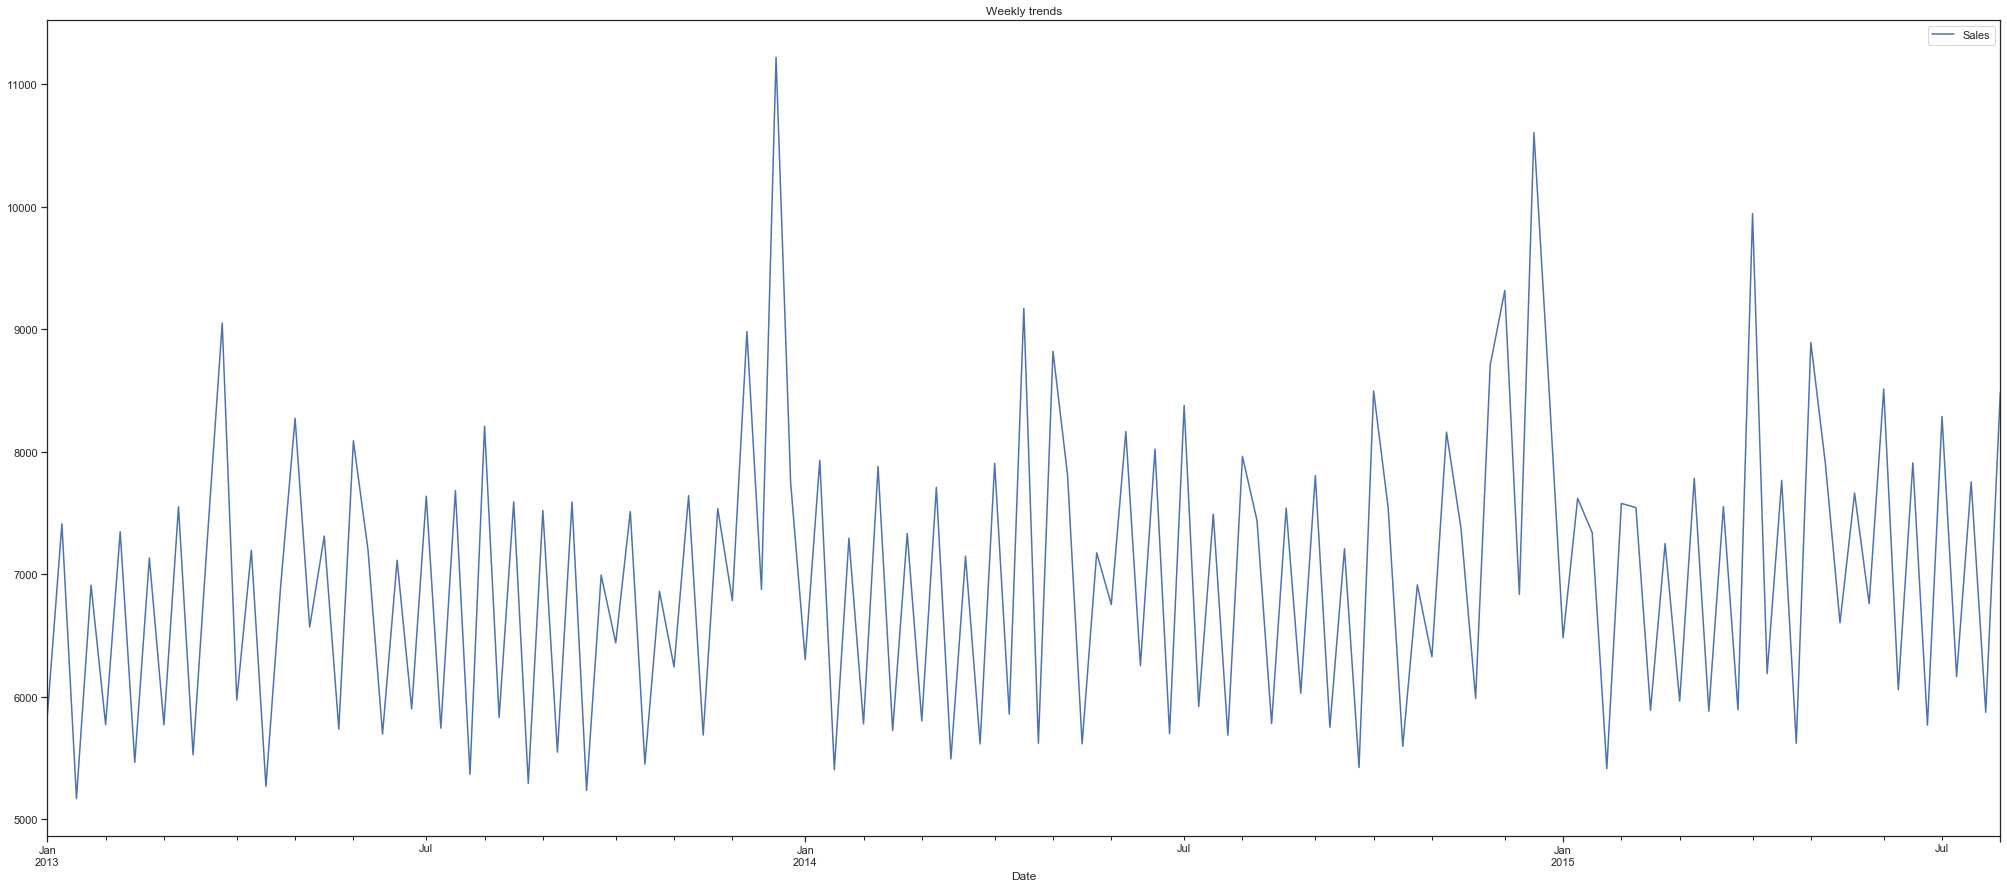

In [245]:
time_series_week = train_time_series.resample('W').mean()
time_series_week.plot(figsize=(35,15))
plt.title("Weekly trends")
#plt.savefig("Weekly_trends.png")
plt.show()

Next we explore the following reserach questions that guide us to do analysis of the key metrics in the merged data. 

### Store analysis
To answer this , we  have  look at the Sales behavior in the store types

In [248]:
sales_desc = train_store_df.groupby('StoreType')['Sales'].describe()
sales_desc
#dfi.export(sales_desc,"sales_desc.png")

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


It is noted that `StoreType B` has the highest average of Sales among all others, however we have much less data for it. So let's print an overall sum of Sales and Customers to see which StoreType is the most selling and crowded one:

In [250]:
cust_sales_desc = train_store_df.groupby('StoreType')['Customers', 'Sales'].sum()
cust_sales_desc
#dfi.export(cust_sales_desc,"cust_sales_desc.png")

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


* The highest store with most sales and customers is `StoreType A` followed by `StoreType D`.Having seen this we can look at the sales behavior before,during and after the holidays.

To confirm the leading `StoreType` with the highest performance, we do a plot of the `SalePerCustomer` per `StoreType`

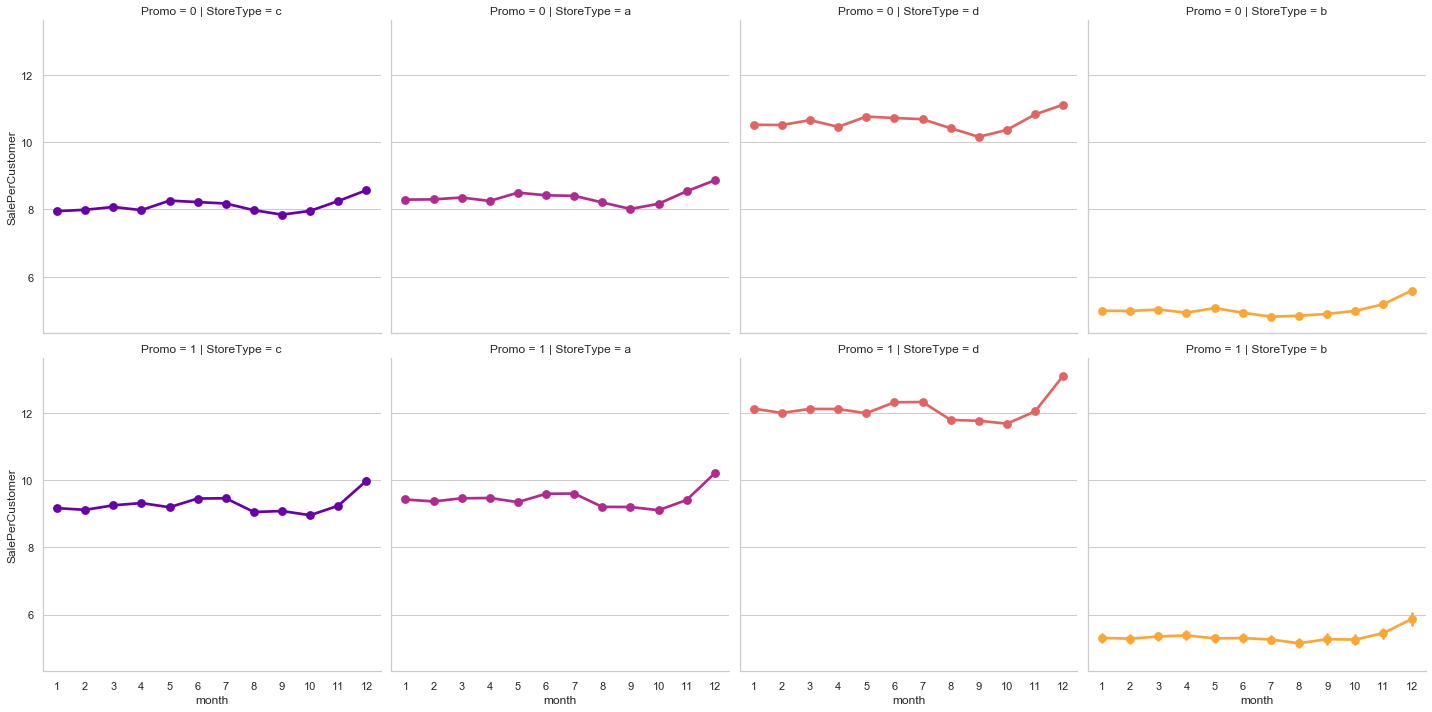

In [251]:
# sale per customer trends
sns.factorplot(data = train_store_df, x = 'month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 
#plt.savefig("sale_per_customer_trends.png")
#plt.show()

* Though the table above showed `StoreType B` as the most selling and performant one, in reality it is not true. The highest `SalePerCustomer` amount is observed at the StoreType D, about 12€ with Promo and 10€ without. As for StoreType A and C it is about 9€.

* Low SalePerCustomer amount for `StoreType B` describes its Buyer Cart: there are a lot of people who shop essentially for "small" things (or in a little quantity). Plus we saw that overall this StoreType generated the least amount of sales and customers over the period.

##### What is the  `Sales` behavior `before, during and after holidays`? 

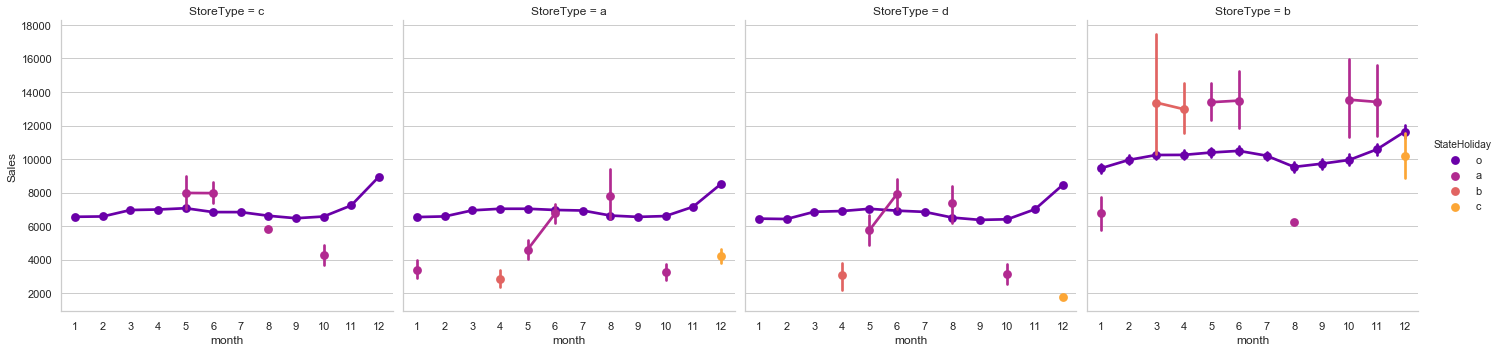

In [252]:
#Sales trend per StateHoliday
'''
a = public holiday, b = Easter holiday, c = Christmas, 0 = None
'''
sns.factorplot(data = train_store_df, x = 'month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StateHoliday',
               color = c) 
plt.savefig("sale_per_StateHoliday_trends.png")
plt.show()

What can you say about the correlation between sales and number of customers?

In [89]:
stats.pearsonr(train_store_df["Customers"],train_store_df["Sales"])[0]

0.8235517202000019

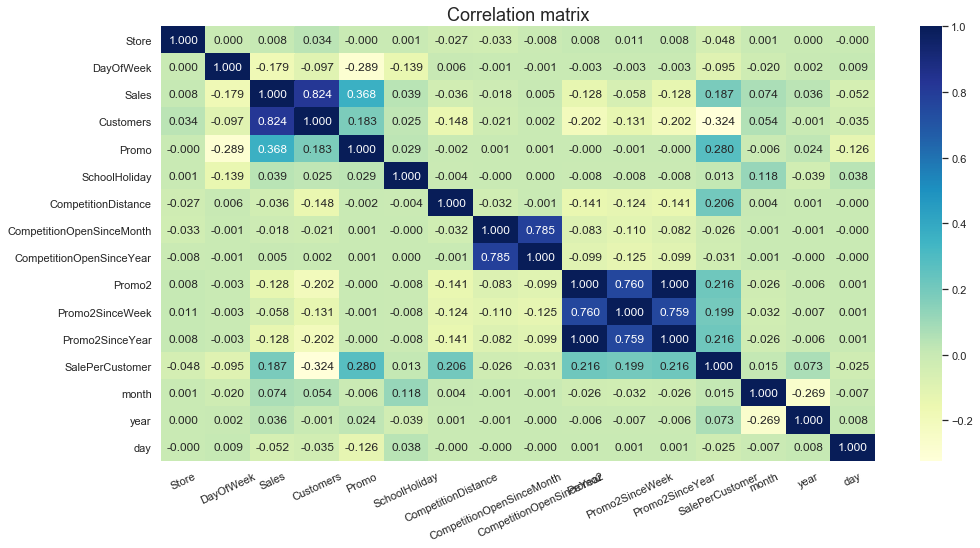

In [260]:
correlation_df = train_store_df[["Store", 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalePerCustomer', 'month', 'year',
       'day']]
corr_table = correlation_df.iloc[:, :].corr()
corr_table
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr_table, annot=True,
                fmt=".3f",
                annot_kws={'size':12},
                cmap="YlGnBu")
plt.title('Correlation matrix', fontsize=18)
plt.tight_layout
plt.xticks(rotation = 25)
plt.savefig("Correlation_heatmap.png")
plt.show()

The pearson correlation factor of 0.82 explains that there is a strong positive correlation between Sales and Customers. We can therefore say, the more customers you have in a store, the higher your sales for the day.

##### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers? 

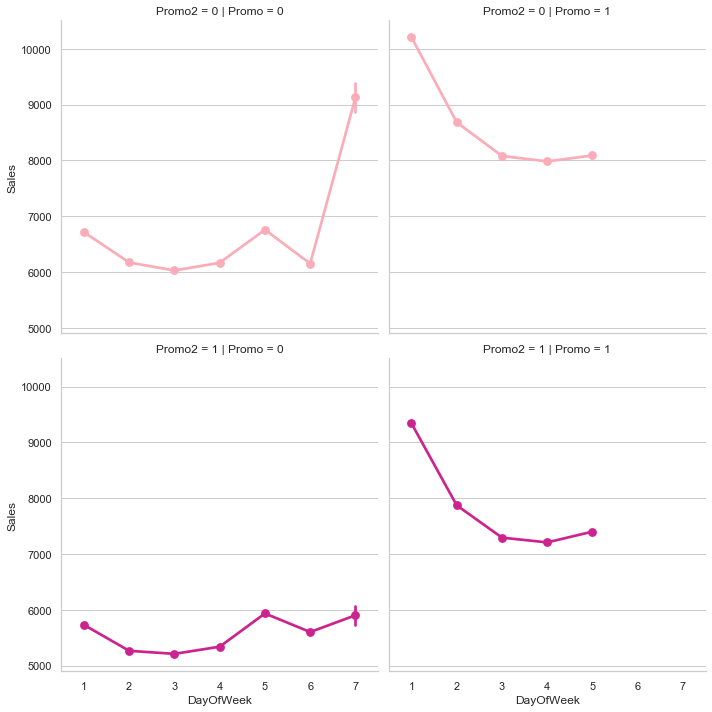

In [261]:
sns.factorplot(data = train_store_df, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu')
plt.savefig("Promotion.png")
plt.show()

It can be noted that when there is no promotion, both Promo and Promo2 are equal to 0, Sales tend to peak on Sunday.
On the contrary, stores that run the promotion tend to make most of the Sales on Monday i.e((Promo and Promo2 are equal to 1)). This fact could be a good indicator for Rossmann marketing campaigns. 

##### Trends of customer behavior during store open and closing times?

In [101]:
train_store_df["Open"].value_counts()

1    844338
Name: Open, dtype: int64

Which stores are opened on all weekdays? How does that affect their sales on weekends? 

<Figure size 1440x864 with 0 Axes>

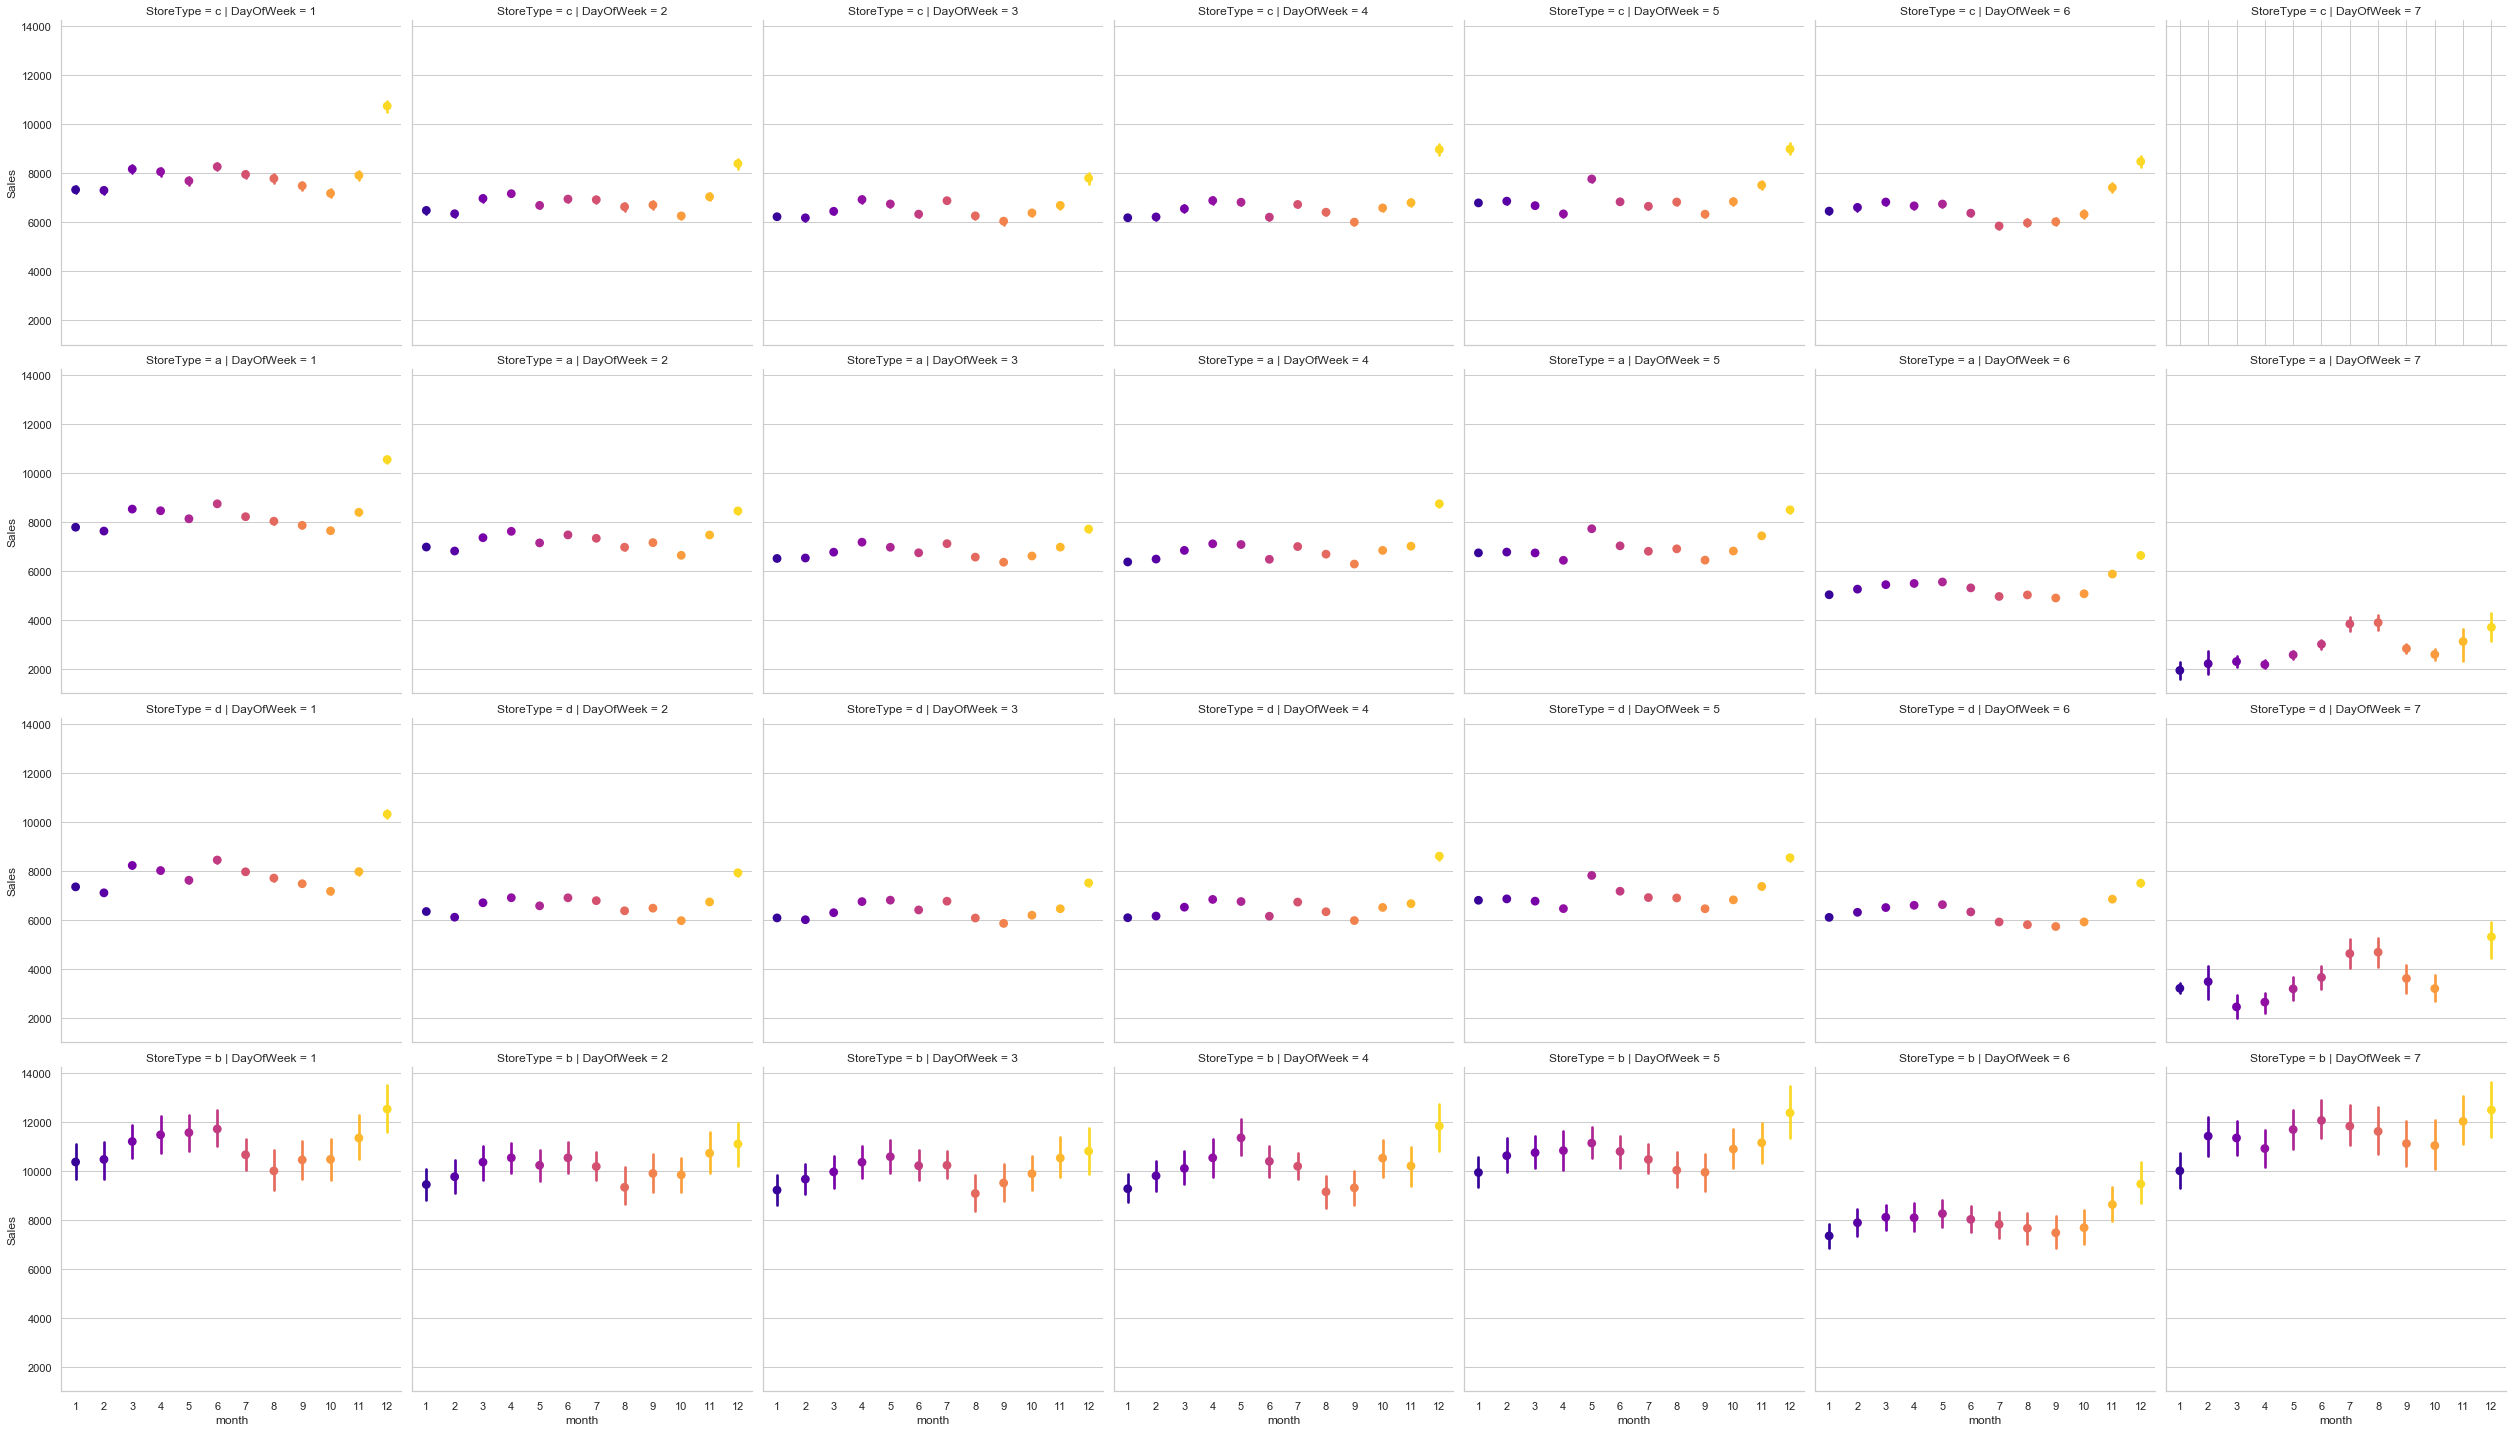

In [262]:
plt.figure(figsize = (20, 12))

sns.factorplot(data = train_store_df, x = 'month', y = 'Sales',
              col = 'DayOfWeek', # per store type in cols
              palette = 'plasma',
              row = 'StoreType', # per store type in rows
              color = c)
plt.savefig("stores_open_1.png")
plt.show()

 All stores are opened in weekdays. However,we see that stores of `StoreType C` are all closed on Sundays except `StoreType A,StoreType B, and StoreType D` 

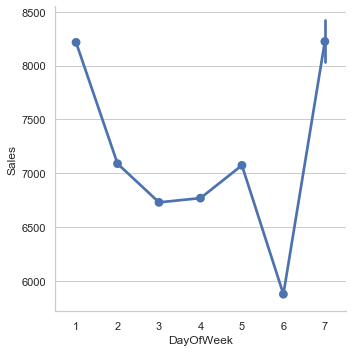

In [263]:
sns.factorplot(data = train_store_df, x ="DayOfWeek", y = "Sales"
              ,sharex=False)
plt.savefig("stores_open_2.png")
plt.show()

In [264]:
#33 Stores are opened on Sundays
print ("Number of Stores opened on Sundays:{}" .format(train_store_df[(train_store_df.Open == 1) & (train_store_df.DayOfWeek == 7)]['Store'].unique().shape[0]))

Number of Stores opened on Sundays:33


On  Sunday we notice  a high peak which is understandable, since a very few stores opens on Sundays (only 33);if anyone needs anything urgently and don't have the time to get it during the week, he/she will have to do some distance to get to the open ones even if it's not close to his house. This means that those 33 open stores on Sunday actually accounts for the potential demand if all  Stores were closed on Sundays. This clearly shows us how important it is for stores to be opened on Sundays.

##### How does the assortment type affects sales?

In [265]:
'''
assortments have three types and each store has a defined type and assortment type:
a- means basic things
b- means extra things
c -means extended things so the highest variety of products.
'''
assorted = train_store_df.groupby("Assortment").agg({"Sales":[sum]})

In [266]:
dfi.export(assorted,"assorted.png")

It is observed that `Assortment a` had the most sales followed by  `Assortment c`.Most customers prefer basic things they are aware of and least interested in the extra things

Going further , we can check the relationship between a `StoreType` and its respective `Assortment type`.

In [267]:
train_store_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

StoreType  Assortment
a          a             286028
           c             171014
b          a               6409
           b               8209
           c                942
c          a              58554
           c              54414
d          a              93884
           c             164884
Name: Assortment, dtype: int64

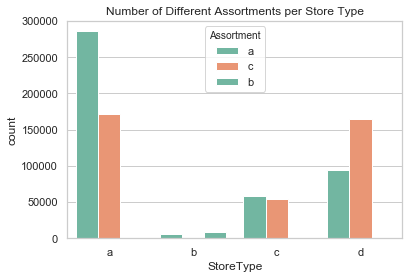

In [268]:
sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=train_store_df,
              palette=sns.color_palette("Set2", n_colors=2)).set_title("Number of Different Assortments per Store Type")
plt.savefig("ASSORTMENT.png")
plt.show()

* Most of the stores have either a assortment type or c assortment type.
*  We note that StoreType d which had the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.This is because aving variety in stores always increases the customers spending pattern.

##### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [269]:
'''
Tto see whether the one with very far competition actually make more sales then the one with close competition.
Since `CompetitionDistance` is a continuous variable, we need to first convert it into a categorical variable with 5 different bins.
'''
train_store_df['CompetitionDist_Cat']=pd.cut(train_store_df['CompetitionDistance'], 5)

In [270]:
train_store_df.head(5)

,Store,Date,day,month,year,DayOfWeek,WeekOfYear,Sales,Customers,Open,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalePerCustomer,CompetitionDist_Cat
0,1,2015-07-31,31,7,2015,5,31,5263,555,1,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0.0,9.482883,"(-55.84, 15188.0]"
1,1,2015-07-30,30,7,2015,4,31,5020,546,1,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0.0,9.194139,"(-55.84, 15188.0]"
2,1,2015-07-29,29,7,2015,3,31,4782,523,1,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0.0,9.143403,"(-55.84, 15188.0]"
3,1,2015-07-28,28,7,2015,2,31,5011,560,1,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0.0,8.948214,"(-55.84, 15188.0]"
4,1,2015-07-27,27,7,2015,1,31,6102,612,1,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0.0,9.970588,"(-55.84, 15188.0]"


In [273]:
train_store_df.groupby(by="CompetitionDist_Cat").Sales.mean()


CompetitionDist_Cat
(-55.84, 15188.0]     6957.360876
(15188.0, 30356.0]    7041.604692
(30356.0, 45524.0]    6471.923562
(45524.0, 60692.0]    5980.114445
(60692.0, 75860.0]    7775.446449
Name: Sales, dtype: float64

In [274]:
train_store_df.groupby(by="CompetitionDist_Cat").Customers.mean()

CompetitionDist_Cat
(-55.84, 15188.0]     771.345223
(15188.0, 30356.0]    691.574605
(30356.0, 45524.0]    680.101854
(45524.0, 60692.0]    643.988246
(60692.0, 75860.0]    914.574972
Name: Customers, dtype: float64

* As shown above, the stores that are the furthest have the highest average sales and number of customers.
* In our case, if the store and its competitors all happen to be in city centres, it means the average sales and number of customers will be relatively low

##### How does the opening or reopening of new competitors affect stores?

In [276]:
# competition open time (in months)
train_store_df['CompetitionOpen'] = 12 * (train_store_df.year - train_store_df.CompetitionOpenSinceYear) + \
        (train_store_df.month - train_store_df.CompetitionOpenSinceMonth)
    
# Promo open time
train_store_df['PromoOpen'] = 12 * (train_store_df.year - train_store_df.Promo2SinceYear) + \
        (train_store_df.WeekOfYear - train_store_df.Promo2SinceWeek) / 4.0

# replace NA's by 0
#train_store_df.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
PromoOpen_time = train_store_df.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()
dfi.export(PromoOpen_time,"PromoOpen_time.png")

The most selling and crowded `StoreType A` doesn't appear to be the one the most exposed to competitors. Instead it's a `StoreType B`, which also has the longest running period of promotion.

### Now we are going to build a model. Consider the Notebook named `Modelling_rosemann_sales`